In [1]:
import scipy

In [2]:
from networkx.algorithms import bipartite
import networkx as nx
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)
import scipy.sparse as sps
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="lil")
mat.setdiag(1)
print(mat.shape)

(40, 40)


In [3]:
from scipy.sparse import triu, tril
# Set diagonal to 1 so matrix is invertible
# Extract upper triangle of symmetric sparse matrix
lower_triangle = tril(mat,format="csc")
mat=lower_triangle
print(mat.shape)

(40, 40)


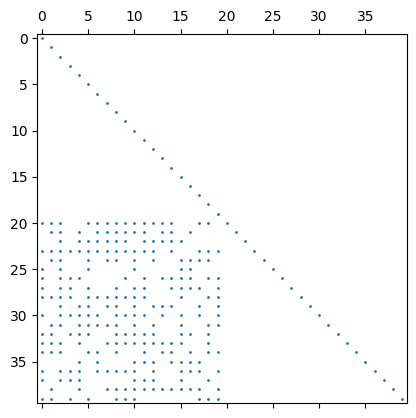

In [4]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(mat, aspect='equal', marker='.', markersize=2)


In [5]:
import time
import numpy as np
start_time = time.time()
# Set the data array in place to random integers between 0 and nnz
randomWeights = np.random.randint(1, 2*mat.shape[0], size=mat.nnz)
two_exp_randomWeights = np.exp2(randomWeights)
mat.data=two_exp_randomWeights
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Randomized Adj in {elapsed_time} seconds")
start_time = time.time()
invMat = sps.linalg.inv(mat)
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Inverted Matrix in {elapsed_time} seconds")

Randomized Adj in 0.00018477439880371094 seconds
Inverted Matrix in 0.009118080139160156 seconds


In [6]:
denseAdj = mat.copy().todense()
denseInv = invMat.copy().todense()

[[ 9.31322575e-10  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000000e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.11758237e-22 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.27373675e-13  0.00000000e+00 -1.13686838e-13 ...  4.76837158e-07
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68435456e+08  0.00000000e+00 ...  0.00000000e+00
   5.96046448e-08  0.00000000e+00]
 [-1.60000000e+01 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.84217094e-14]]


In [8]:
from scipy import linalg
denseAdj = mat.copy().todense()
denseInv = invMat.copy().todense()
Bij = denseInv
w = linalg.det(Bij)
for e in G.edges:
    i=e[0]
    j=e[1]
    print(i,j)
    Aij = denseAdj.copy()
    Aij[i,:]=0.0
    Aij[:,j]=0.0
    #Aij[i,j]=denseAdj[i,j]
    try:
        Bij = linalg.inv(Aij)
        det = linalg.det(Bij)
        print(2**Aij[i,j])
        print(det)
    except Exception :
        continue


0 20
0 23
0 25
0 26
0 27
0 28
0 30
0 32
0 33
0 34
0 36
0 37
0 39
1 20
1 21
1 23
1 24
1 28
1 31
1 32
1 33
1 34
1 38
1 39
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 33
2 34
2 36
2 37
3 23
3 26
3 27
3 28
3 30
3 32
3 36
3 37
3 39
4 21
4 22
4 23
4 26
4 29
4 30
4 31
4 32
4 33
4 35
4 36
4 37
4 38
5 20
5 22
5 23
5 24
5 25
5 27
5 28
5 29
5 30
5 31
5 32
5 34
5 39
6 20
6 21
6 22
6 23
6 28
6 30
6 31
6 34
6 35
6 36
7 20
7 21
7 22
7 23
7 24
7 28
7 29
7 31
7 33
7 36
7 38
8 20
8 21
8 22
8 23
8 24
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 36
8 38
8 39
9 20
9 21
9 22
9 23
9 26
9 28
9 30
9 32
9 33
9 36
9 38
9 39
10 20
10 21
10 23
10 24
10 25
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 35
10 36
10 37
10 38
10 39
11 20
11 21
11 22
11 23
11 26
11 27
11 28
11 30
11 32
11 33
11 34
11 35
11 37
11 38
12 20
12 22
12 23
12 24
12 29
12 31
12 32
12 33
12 35
12 36
12 37
12 38
13 20
13 21
13 22
13 26
13 29
13 30
13 33
13 34
13 38
14 20
14 21
14 22
14 23
14 26
14 27
14 29
14 33
14 34
14 35
14 38
15